# composite_vert_d18O_JJA

In [1]:
import warnings
warnings.simplefilter("ignore")
import statsmodels.api as sm
import numpy as np
import pandas as pd
#
import matplotlib
import matplotlib.pyplot as plt
#
import cartopy.crs as ccrs

In [2]:
# 描画設定
plt.rcParams['figure.dpi'] = 300
plt.rcParams.update({'font.family': 'sans-serif', 'text.usetex': False,'pcolor.shading':'auto'})

In [3]:
class Site:
    def DomeF(self):
        # DomeF
        # 南緯77度19分01秒 東経39度42分12秒座標: 南緯77度19分01秒 東経39度42分12秒
        sx=14 ; sy=60 #;; # 77°18′59″S 39°42′04″E
        df_lat=-77.3
        df_lon=39.66
        return df_lon,df_lat,sx,sy

df_lon,df_lat,df_x,df_y = Site().DomeF()

In [4]:
class draw_map:
    import cartopy.crs as ccrs

    def label_h(self,fig,ax,barplot,cs,levels,label,fontsize):
        import matplotlib.pyplot as plt
        cbaCorrax = fig.add_axes(barplot)
        cbar=plt.colorbar(cs, cax=cbaCorrax,orientation='horizontal',ticks=levels) 
        cbar.ax.tick_params(labelsize=fontsize) 
        cbar.set_label(label, size=fontsize)
        
        
    def label_v(self,fig,ax,barplot,cs,levels,label,fontsize):
        import matplotlib.pyplot as plt
        cbaCorrax = fig.add_axes(barplot)
        cbar=plt.colorbar(cs, cax=cbaCorrax,orientation='vertical',ticks=levels) 
        cbar.ax.tick_params(labelsize=fontsize) 
        cbar.set_label(label, size=fontsize)

In [65]:
class draw_Ant:
    def raw(self,ax,area,title,x,y,var0,norm,cmap,levels,fontsize=24,alpha=1):
        import cartopy.crs as ccrs
        ax.set_boundary(draw_Ant().circle(), transform=ax.transAxes)
        ax.set_title(title, fontsize=fontsize) 
        
        cm = plt.get_cmap(cmap)
        cs = ax.contourf(x, y, var0, 
                             norm=norm, cmap=cmap, levels=levels, alpha=alpha,
                             transform=ccrs.PlateCarree(),extend = "both")
        df_lon, df_lat,sx,sy = Site().DomeF()
        ax.scatter(df_lon,df_lat,c="darkgray", s=600, 
                       marker='^', edgecolors='white', linewidth=1, zorder=3,transform=ccrs.PlateCarree())
        ax.set_global()
        ax.coastlines()
        ax.set_extent(area, crs=ccrs.PlateCarree())
 
        return cs


    def cont(self,ax,area,title,x,y,var0,norm,cmap,levels,fontsize=24):
        import cartopy.crs as ccrs
        ax.set_boundary(draw_Ant().circle(), transform=ax.transAxes)
        ax.set_title(title, fontsize=fontsize) 
        
        cm = plt.get_cmap(cmap)
        cs = ax.contour(x, y, var0, 
                             colors="darkgray",levels=levels,linewidth=5,
                             transform=ccrs.PlateCarree(),extend = "both")
        cs = ax.contourf(x, y, var0, 
                             colors="gray", levels=[0,100], linewidth=8,hatches=[None, '/'],alpha=0.3,
                             transform=ccrs.PlateCarree(),extend = "low")
#        cs.clabel(cs.levels, fontsize=24, fmt="%d")
        df_lon, df_lat,sx,sy = Site().DomeF()
        ax.scatter(df_lon,df_lat,c="black", s=600, 
                       marker='^', edgecolors='white', linewidth=1, zorder=3,transform=ccrs.PlateCarree())
        
        ax.set_global()
        ax.coastlines()
        ax.set_extent(area, crs=ccrs.PlateCarree())
        
        return cs
    
    def circle(self):
        import numpy as np
        import matplotlib.path as mpath
        theta = np.linspace(0, 2*np.pi, 100)
        center, radius = [0.5, 0.5], 0.5
        verts = np.vstack([np.sin(theta), np.cos(theta)]).T
        circle = mpath.Path(verts * radius + center)
        
        return circle 

In [6]:
def Color_Set(levels,cmapname):
    import matplotlib.pyplot as plt
    import matplotlib.colors as mc
    cmap = plt.get_cmap(cmapname, len(levels)+1)
    colors = cmap(range(cmap.N))
    cmap, norm = mc.from_levels_and_colors(levels,colors,extend="both")
    return cmap, norm     

In [7]:
loadfile  = "prcp.npz"
dataset   = np.load(loadfile)
prcp      = dataset["prcp"]
lon2 = dataset["lon2"]
lat2 = dataset["lat2"]
y        = dataset["y"]
m        = dataset["m"]
d        = dataset["d"]

In [8]:
loadfile = "prcp_d18O_index.npz"
dataset = np.load(loadfile)
d18O_index = dataset["index"]

In [9]:
loadfile = "uprecw.npz"
dataset = np.load(loadfile)
uprecw = dataset["uprecw"]

In [10]:
loadfile = "vprecw.npz"
dataset = np.load(loadfile)
vprecw = dataset["vprecw"]

In [11]:
loadfile = "precw.npz"
dataset = np.load(loadfile)
precw = dataset["precw"]

In [12]:
loadfile = "precw_d18O.npz"
dataset = np.load(loadfile)
precw_d18O = dataset["precw_d18O"]

In [37]:
loadfile = "sam.npz"
dataset  = np.load(loadfile)
sam      = dataset["sam"]

In [38]:
uprecw_sam_p = uprecw[:,:,sam>=1.0]
uprecw_sam_m = uprecw[:,:,sam<=-1.0]
vprecw_sam_p = vprecw[:,:,sam>=1.0]
vprecw_sam_m = vprecw[:,:,sam<=-1.0]
precw_sam_p = precw[:,:,sam>=1.0]
precw_sam_m = precw[:,:,sam<=-1.0]
precw_d18O_sam_p = precw_d18O[:,:,sam>=1.0]
precw_d18O_sam_m = precw_d18O[:,:,sam<=-1.0]
m_sam_p = m[sam>=1.0]
m_sam_m = m[sam<=-1.0]

In [40]:
uprecwJJA_sam_p=np.nanmean(uprecw_sam_p[:,:,((m_sam_p==6)+(m_sam_p==7)+(m_sam_p==8))],2)
uprecwJJA_sam_m=np.nanmean(uprecw_sam_m[:,:,((m_sam_m==6)+(m_sam_m==7)+(m_sam_m==8))],2)

In [41]:
vprecwJJA_sam_p=np.nanmean(vprecw_sam_p[:,:,((m_sam_p==6)+(m_sam_p==7)+(m_sam_p==8))],2)
vprecwJJA_sam_m=np.nanmean(vprecw_sam_m[:,:,((m_sam_m==6)+(m_sam_m==7)+(m_sam_m==8))],2)

In [42]:
precwJJA_sam_p=np.nanmean(precw_sam_p[:,:,((m_sam_p==6)+(m_sam_p==7)+(m_sam_p==8))],2)
precwJJA_sam_m=np.nanmean(precw_sam_m[:,:,((m_sam_m==6)+(m_sam_m==7)+(m_sam_m==8))],2)

In [43]:
precw_d18OJJA_sam_p=np.nanmean(precw_d18O_sam_p[:,:,((m_sam_p==6)+(m_sam_p==7)+(m_sam_p==8))]*precw_sam_p[:,:,((m_sam_p==6)+(m_sam_p==7)+(m_sam_p==8))],2)/precwJJA_sam_p
precw_d18OJJA_sam_m=np.nanmean(precw_d18O_sam_m[:,:,((m_sam_m==6)+(m_sam_m==7)+(m_sam_m==8))]*precw_sam_m[:,:,((m_sam_m==6)+(m_sam_m==7)+(m_sam_m==8))],2)/precwJJA_sam_m

In [39]:
thres=1

In [14]:
pmax=np.max(prcp[df_x-1,df_y-1,:])

prcp_p = prcp[df_x-1,df_y-1,d18O_index>=thres]
prcp_n = prcp[df_x-1,df_y-1,d18O_index<=-1*thres]
d18O_index[np.isnan(prcp[df_x-1,df_y-1,:])]=np.nan

prcp [:,:,prcp[df_x-1,df_y-1,:]==pmax]=np.nan

In [15]:
m_p = m[d18O_index>=thres]
m_m = m[d18O_index<=-1*thres]

In [16]:
uprecw_p = uprecw[:,:,d18O_index>=thres]
uprecw_m = uprecw[:,:,d18O_index<=-1*thres]
vprecw_p = vprecw[:,:,d18O_index>=thres]
vprecw_m = vprecw[:,:,d18O_index<=-1*thres]

In [17]:
precw_p = precw[:,:,d18O_index>=thres]
precw_m = precw[:,:,d18O_index<=-1*thres]
precw_d18O_p = precw_d18O[:,:,d18O_index>=thres]
precw_d18O_m = precw_d18O[:,:,d18O_index<=-1*thres]

In [18]:
uprecwJJA_p=np.mean(uprecw_p[:,:,((m_p==6)+(m_p==7)+(m_p==8))],2)
uprecwJJA_m=np.mean(uprecw_m[:,:,((m_m==6)+(m_m==7)+(m_m==8))],2)

In [19]:
vprecwJJA_p=np.mean(vprecw_p[:,:,((m_p==6)+(m_p==7)+(m_p==8))],2)
vprecwJJA_m=np.mean(vprecw_m[:,:,((m_m==6)+(m_m==7)+(m_m==8))],2)

In [20]:
precwJJA_p=np.mean(precw_p[:,:,((m_p==6)+(m_p==7)+(m_p==8))],2)
precwJJA_m=np.mean(precw_m[:,:,((m_m==6)+(m_m==7)+(m_m==8))],2)

In [21]:
precw_d18OJJA_p=np.nanmean(precw_d18O_p[:,:,((m_p==6)+(m_p==7)+(m_p==8))]*precw_p[:,:,((m_p==6)+(m_p==7)+(m_p==8))],2)/precwJJA_p
precw_d18OJJA_m=np.nanmean(precw_d18O_m[:,:,((m_m==6)+(m_m==7)+(m_m==8))]*precw_m[:,:,((m_m==6)+(m_m==7)+(m_m==8))],2)/precwJJA_m

In [22]:
barplot2=np.zeros((2,4))
barplot2[0,:]=[0.02, 0.1, 0.47, 0.05]
barplot2[1,:]=[0.52, 0.1, 0.47, 0.05]

## Figures

In [23]:
label_n="$\mathrm{\delta^-}$"
label_p="$\mathrm{\delta^+}$"

In [25]:
def make_colorpalet(colorname="viridis",levels=[10,30,60,70,90]):
    import matplotlib.colors as mc
    # https://hackmd.io/@h2tg95D2RP2ed-D8u-49Mg/S1moBqaRr
    white="#ffffff"
    lightcyan="#E0FFFF"
    paleturquoise="#AFEEEE"
#    color_code=[paleturquoise,lightcyan,white]
    color_code=[paleturquoise,white]
    num = len(levels)-len(color_code)+1
    color_code.extend(get_color_code(colorname,num)[:])

    # カラーマップ作成(→ 1)
    cmap, norm = mc.from_levels_and_colors(levels,color_code,extend="both")
    
    return cmap, norm 

def get_color_code(cname,num):
    import matplotlib.cm as cm
    from matplotlib.colors import rgb2hex
    
    cmap = cm.get_cmap(cname,num)

    code_list =[]
    for i in range(cmap.N):
        rgb = cmap(i)[:3]
#        print(rgb2hex(rgb))
        code_list.append(rgb2hex(rgb))

    return code_list

In [26]:
T_levels = [-70,-60,-50, -40, -30, -20,  -10, 0,10,20,30]
T_label = "Air Temperature anomaly [℃]"

In [27]:
vq_levels =[-3,-2,-1,-0.5,-0.1,0.1,0.5,1,2,3]
vq_cmapname = "coolwarm"
vq_cmap, vq_norm = Color_Set(vq_levels, vq_cmapname)
vq_label = "Meridional Q-Flux Anomaly [g/kg $\mathsf{\cdot}$ m/s]"
color_code=(get_color_code(vq_cmapname,len(vq_levels)+1)[:])
mid=(len(color_code)-1)/2
color_code[int(mid)]="#ffffff"
import matplotlib.colors as mc
vq_cmap, vq_norm = mc.from_levels_and_colors(vq_levels,color_code,extend="both")

In [28]:
vprecw_levels =[-50,-45,-40,-35,-30, -25,-20,-15, -10, -5,0,5,  10, 15,20,25,30,35,40,45,50]
vprecw_cmapname = "Greys_r"
vprecw_cmap, vprecw_norm = Color_Set(vprecw_levels, vprecw_cmapname)
vprecw_label="Vertically Intergrated Meridional Q-flux Anomaly\n[g/kg $\mathsf{\cdot}$ m/s]"

In [29]:
d18O_levels = [-30,-20,-15,-10,-4,-2,-1,-0.5,0.5,1,2,4,10,15,20,30]
d18O_cmapname = "bwr"
d18O_cmap, d18O_norm = Color_Set(d18O_levels, d18O_cmapname)
d18O_label="Vertically Integrated $\mathsf{\delta^{18}O}_v$ Anomaly [\u2030]"
color_code=(get_color_code(d18O_cmapname,len(d18O_levels)+1)[:])
mid=(len(color_code)-1)/2
color_code[int(mid)]="#ffffff"
color_code=color_code[3:]
d18O_levels = d18O_levels[3:]
import matplotlib.colors as mc
d18O_cmap, d18O_norm = mc.from_levels_and_colors(d18O_levels,color_code,extend="both")

In [52]:
levels = [-10,-8,-6,-4,-2,-1,1,2,4,6,8,10]
cmapname = "coolwarm"
cmap, norm = Color_Set(levels, cmapname)
def draw_field2a(ax, var1, var2, title1="", label1="",levels1=levels, cmap1=cmap, norm1=norm,title2="",
                label3="",titleb="",levels3=levels, cmap3=cmap, norm3=norm, dome_lat=df_lat, dome_name="DF" ):
    cs = draw_Ant().raw(ax,[-180, 180, -90, -20],title1,lon2,lat2,var1,norm3,cmap3,levels3)
   
    cs2 = draw_Ant().cont(ax,[-180, 180, -90, -20],title1,lon2,lat2,var2,norm1,cmap1,levels1)
                
    return cs

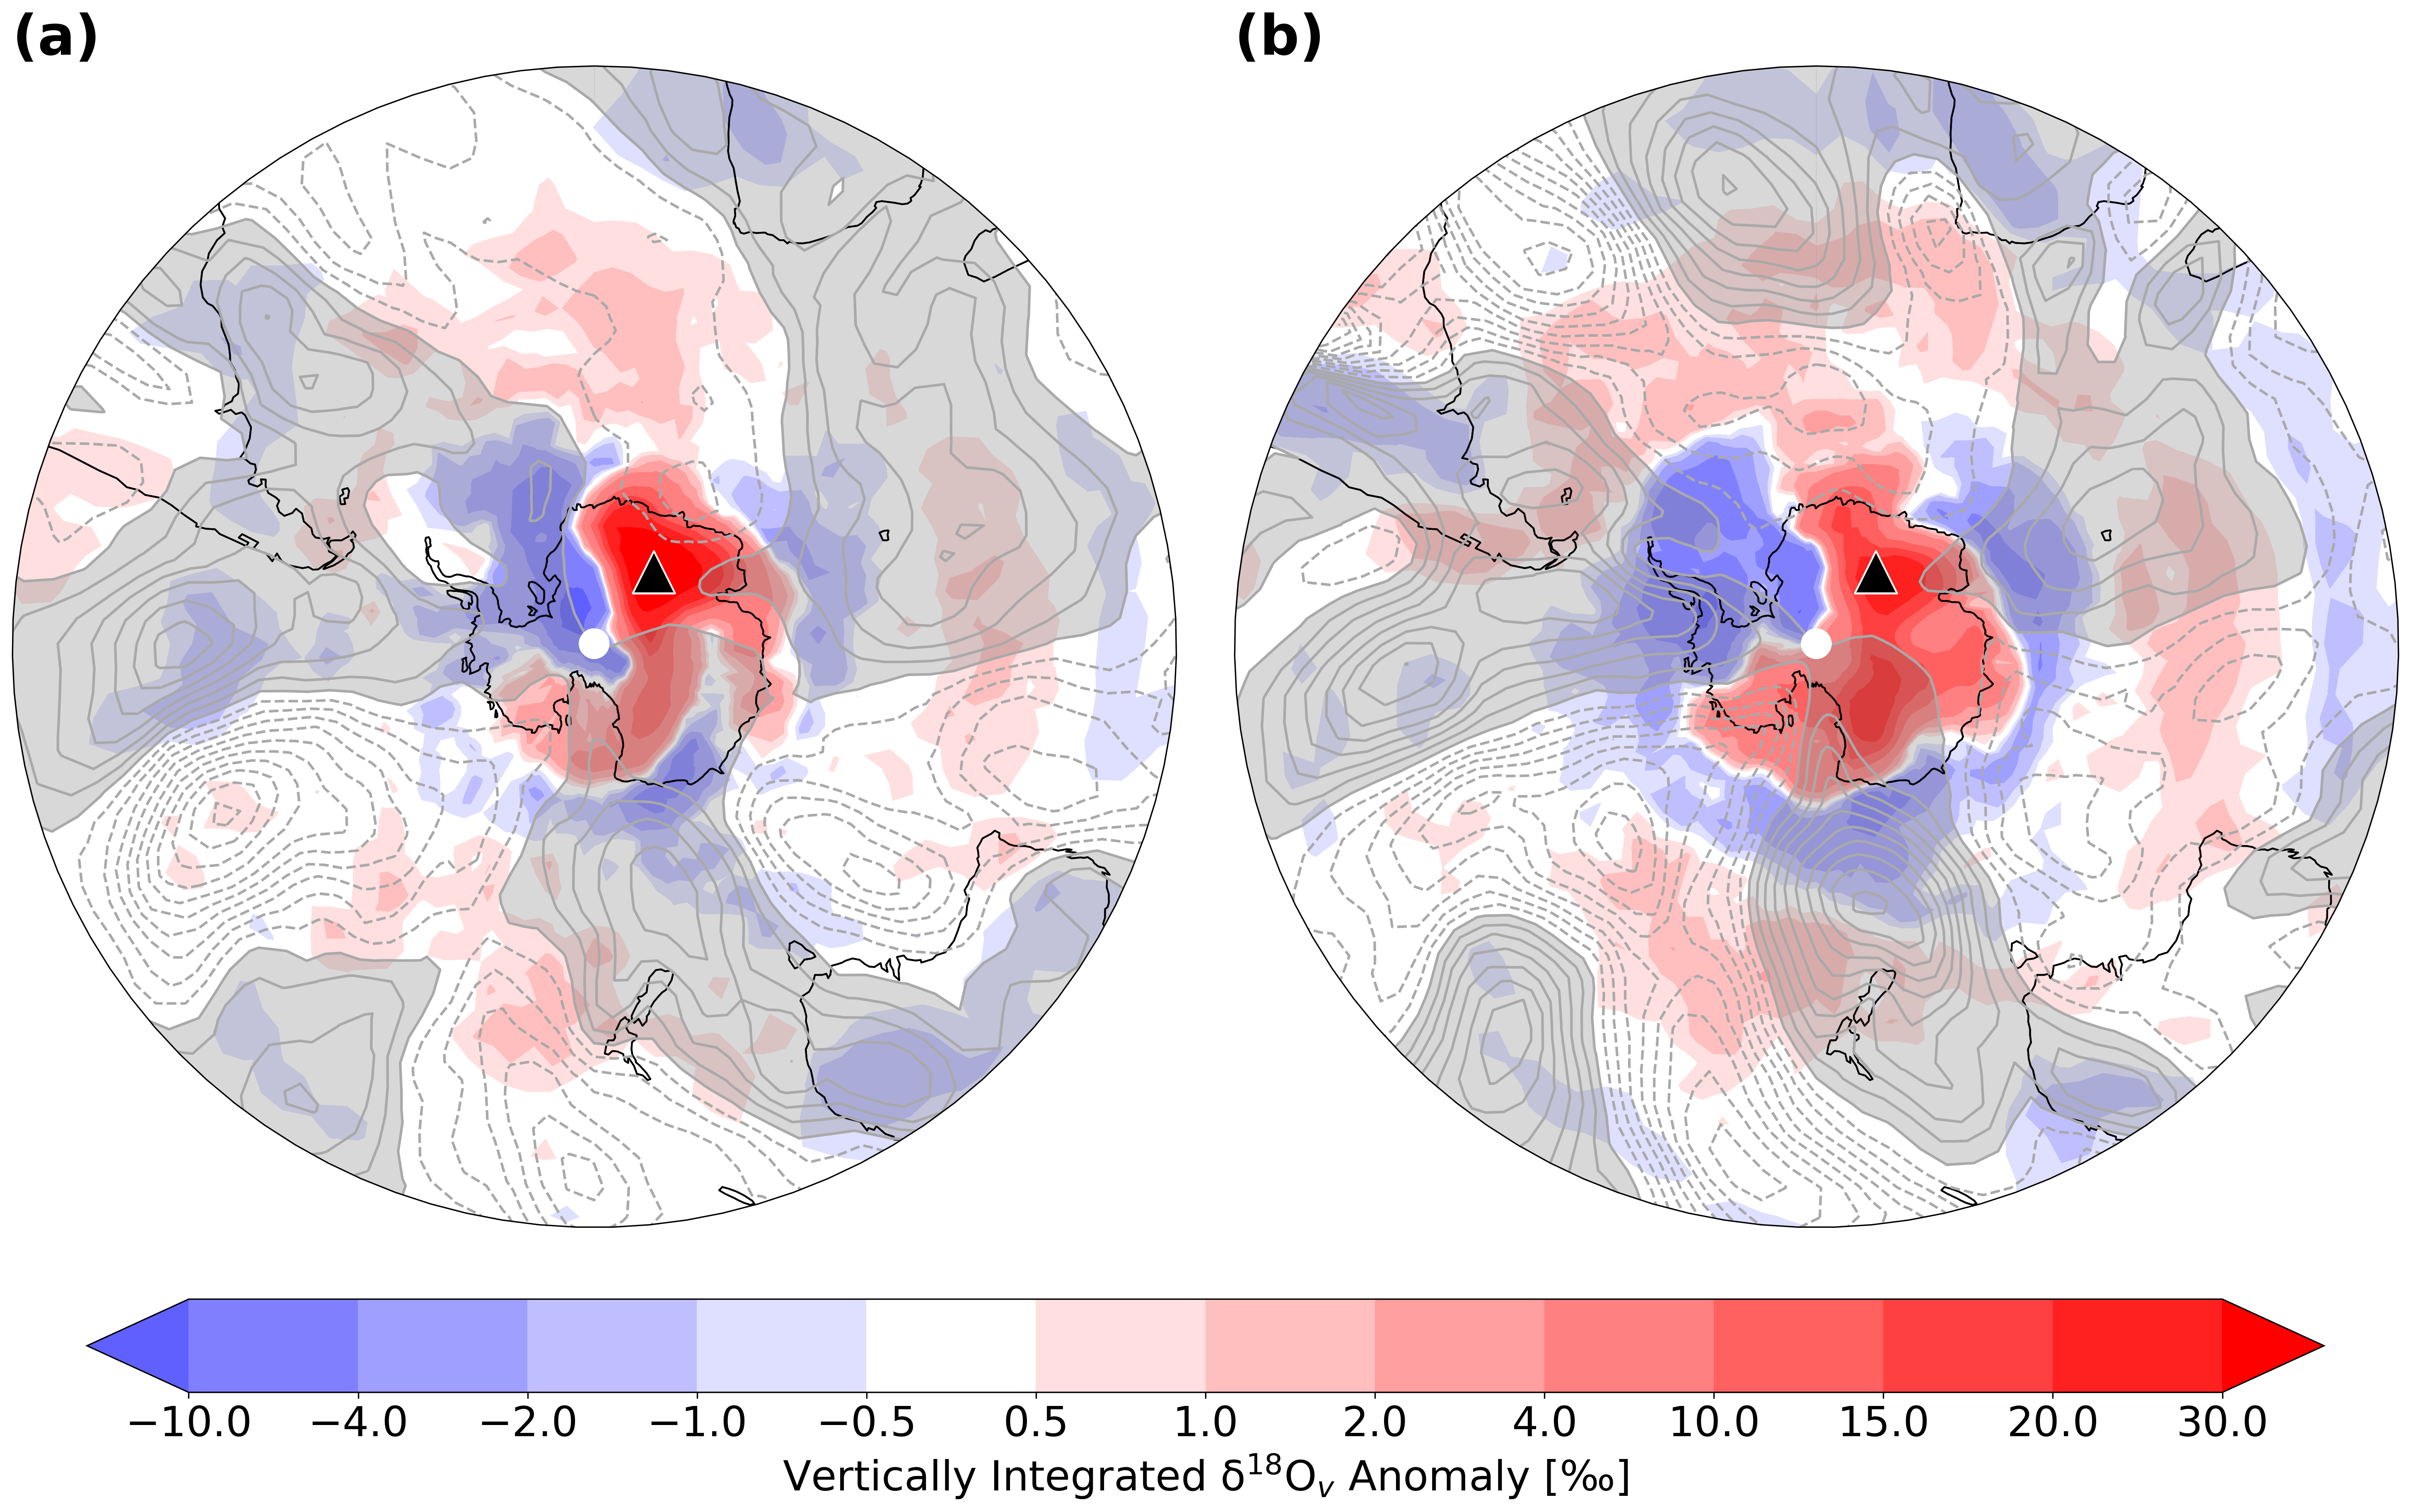

In [66]:
fig = plt.figure(figsize=(20,15))

ax = plt.subplot2grid((1,2), (0, 0), projection=ccrs.SouthPolarStereo())
cs1=draw_field2a(ax,precw_d18OJJA_p-precw_d18OJJA_m,vprecwJJA_p-vprecwJJA_m,label1=vprecw_label,levels1=vprecw_levels, cmap1=vprecw_cmap, norm1=vprecw_norm,levels3=d18O_levels, cmap3=d18O_cmap, norm3=d18O_norm,label3=d18O_label)
ax.set_title("(a) " , loc="left",fontsize=32,weight="demibold")

ax = plt.subplot2grid((1,2), (0, 1), projection=ccrs.SouthPolarStereo())
cs2=draw_field2a(ax,precw_d18OJJA_sam_m-precw_d18OJJA_sam_p,vprecwJJA_sam_m-vprecwJJA_sam_p,label1=vprecw_label,levels1=vprecw_levels, cmap1=vprecw_cmap, norm1=vprecw_norm,levels3=d18O_levels, cmap3=d18O_cmap, norm3=d18O_norm,label3=d18O_label)
ax.set_title("(b) " , loc="left",fontsize=32,weight="demibold")
cbaCorrax = fig.add_axes([0.05, 0.1, 0.9, 0.05])
cbar=plt.colorbar(cs2, cax=cbaCorrax,orientation='horizontal',ticks=d18O_levels) 
cbar.ax.tick_params(labelsize=24) 
cbar.set_label(d18O_label, size=24)
plt.subplots_adjust(top=0.9,bottom=0.1,left=0.02,right=0.98,hspace=0.1,wspace=0.05)
#draw_map().label_h(fig,ax,barplot2[0,:], cs2,d18O_label,d18O_label,24)
fig.show()
fig.savefig("composite_vert_JJA.png")

Kanon Kino (kanon@aori.u-tokyo.ac.jp)